In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### 7.1 Handling Missing Data

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

**isnull()**

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

**NA means Not available, In python we None is also treated as NA**

In [4]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

NA handling methods:
* dropna
* fillna
* isnull
* notnull

##### Filtering Out Missing Data

In [5]:
# dropna
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [6]:
# dropna is equivalent to 
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [7]:
# drop rows if any element is None
data = pd.DataFrame([[1., 6.5, 3.],
                    [1., NA, NA],
                    [NA, 6.5, 3.],
                    [NA, NA, NA]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,6.5,3.0
3,NaN,NaN,NaN


In [8]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [9]:
# droping rows only when all values are NA
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,6.5,3.0


In [10]:
# to drop columns
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,6.5,3.0,NaN
3,NaN,NaN,NaN,NaN


In [11]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,6.5,3.0
3,NaN,NaN,NaN


**dropna()** with threshold

In [12]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.223471,NaN,NaN
1,1.200589,NaN,NaN
2,1.679495,NaN,-0.306933
3,1.026739,NaN,-0.025341
4,-0.806140,-1.068582,-1.820468
5,0.020941,0.774420,0.415624
6,-2.200484,-0.624642,2.035076


In [13]:
# without threshold
df.dropna()

,0,1,2
4,-0.806140,-1.068582,-1.820468
5,0.020941,0.774420,0.415624
6,-2.200484,-0.624642,2.035076


In [14]:
# with threshold 
df.dropna(thresh=2)

,0,1,2
2,1.679495,NaN,-0.306933
3,1.026739,NaN,-0.025341
4,-0.806140,-1.068582,-1.820468
5,0.020941,0.774420,0.415624
6,-2.200484,-0.624642,2.035076


##### Filling In Missing Data

In [15]:
# fillna
df.fillna(0)

,0,1,2
0,1.223471,0.000000,0.000000
1,1.200589,0.000000,0.000000
2,1.679495,0.000000,-0.306933
3,1.026739,0.000000,-0.025341
4,-0.806140,-1.068582,-1.820468
5,0.020941,0.774420,0.415624
6,-2.200484,-0.624642,2.035076


In [16]:
# fillna with dict
df.fillna({1: 1, 2:2})

,0,1,2
0,1.223471,1.000000,2.000000
1,1.200589,1.000000,2.000000
2,1.679495,1.000000,-0.306933
3,1.026739,1.000000,-0.025341
4,-0.806140,-1.068582,-1.820468
5,0.020941,0.774420,0.415624
6,-2.200484,-0.624642,2.035076


In [17]:
# fillna with inplace
df.fillna(0, inplace=True)
df

,0,1,2
0,1.223471,0.000000,0.000000
1,1.200589,0.000000,0.000000
2,1.679495,0.000000,-0.306933
3,1.026739,0.000000,-0.025341
4,-0.806140,-1.068582,-1.820468
5,0.020941,0.774420,0.415624
6,-2.200484,-0.624642,2.035076


In [18]:
# fillna with forward fill
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-1.442125,-0.283095,-0.658605
1,0.912500,0.255866,-0.787217
2,0.099451,NaN,1.176612
3,1.135102,NaN,-1.335776
4,-0.890850,NaN,NaN
5,-0.362459,NaN,NaN


In [19]:
df.fillna(method='ffill')

,0,1,2
0,-1.442125,-0.283095,-0.658605
1,0.912500,0.255866,-0.787217
2,0.099451,0.255866,1.176612
3,1.135102,0.255866,-1.335776
4,-0.890850,0.255866,-1.335776
5,-0.362459,0.255866,-1.335776


In [20]:
# fill method with limit
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.442125,-0.283095,-0.658605
1,0.912500,0.255866,-0.787217
2,0.099451,0.255866,1.176612
3,1.135102,0.255866,-1.335776
4,-0.890850,NaN,-1.335776
5,-0.362459,NaN,-1.335776


Other ways like fill with mean/median values:

In [21]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

#### 7.2 Data Transformation

##### Removing Duplicates 

In [22]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1, 1, 2, 3, 3, 4, 4]})

In [23]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


**duplicated()**

In [24]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

**drop_duplicates()**

In [25]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [26]:
# for specific columns
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [27]:
# by default 1st occurance is preserved
# we can modify the same using keep option
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


##### Transforming Data Using a Function or Mapping

In [28]:
#example
data = pd.DataFrame({
    'Food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
})
data

,Food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [29]:
# we need to add a column based on mapping
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}


In [30]:
# convert to lower case
lowercased = data['Food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: Food, dtype: object

In [31]:
data['animal'] = lowercased.map(meat_to_animal)
data

,Food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [32]:
# alternatively we can pass a function
data['Food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: Food, dtype: object

##### Replacing Values

In [33]:
data = pd.Series([1., -999., 2., -999., -1000, 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [34]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [35]:
# replacing multiple values
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [36]:
# using different replacement for different values
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [37]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

##### Renaming Axis Indexes

In [38]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                   index=['Ohio', 'Colorado', 'New York'],
                   columns=['one', 'two', 'three', 'four'])

In [39]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [40]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [41]:
# without modifying the original object
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [42]:
# using dict
data.rename(index={'OHIO': 'INDIANA'},
           columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [43]:
# with inplace
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [44]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


##### Discretization and Binning 

In [45]:
# creating bins
ages = [18, 20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 100]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats # categorical object

[NaN, (18.0, 25.0], (18.0, 25.0], (18.0, 25.0], (25.0, 35.0], ..., (60, 100], (35, 60], (35, 60], (25, 35], (60, 100]]
Length: 14
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [46]:
# list categories
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [47]:
# categories index
cats.codes

array([-1,  0,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1,  3], dtype=int8)

In [48]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    2
dtype: int64

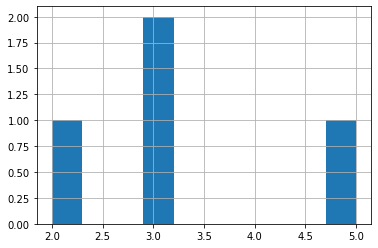

In [49]:
pd.value_counts(cats).hist()

parenthesis means excluded and open<br>
square bracket means inclusive and closed

In [50]:
# to change intervals notation
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [18, 25), [25, 35), [25, 35), ..., [60.0, 100.0), [35.0, 60.0), [35.0, 60.0), [25.0, 35.0), NaN]
Length: 14
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [51]:
# passing custom bins names
group_names = ['Youth', 'YouthAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels = group_names)

[NaN, Youth, Youth, Youth, YouthAdult, ..., Senior, MiddleAged, MiddleAged, YouthAdult, Senior]
Length: 14
Categories (4, object): [Youth < YouthAdult < MiddleAged < Senior]

In [52]:
# if integer is passed instead of bins values, uniformly bins are created
data = np.random.rand(1000)
pd.cut(data, 4, precision=2) # precision to 

[(9.5e-05, 0.25], (9.5e-05, 0.25], (0.25, 0.5], (0.25, 0.5], (9.5e-05, 0.25], ..., (0.5, 0.75], (0.25, 0.5], (9.5e-05, 0.25], (0.5, 0.75], (0.5, 0.75]]
Length: 1000
Categories (4, interval[float64]): [(9.5e-05, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

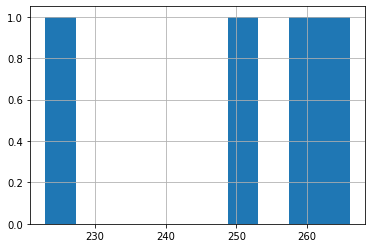

In [53]:
pd.value_counts(pd.cut(data, 4, precision=2)).hist()

qcut, bins the data on sample quantiles

In [54]:
data = np.random.randn(1000) # this will be normally distributed
cats = pd.qcut(data, 4) # no. of quantiles
cats

[(0.617, 3.192], (-4.357, -0.722], (-4.357, -0.722], (-4.357, -0.722], (-0.0443, 0.617], ..., (0.617, 3.192], (0.617, 3.192], (-0.0443, 0.617], (-4.357, -0.722], (0.617, 3.192]]
Length: 1000
Categories (4, interval[float64]): [(-4.357, -0.722] < (-0.722, -0.0443] < (-0.0443, 0.617] < (0.617, 3.192]]

In [55]:
pd.value_counts(cats)

(0.617, 3.192]       250
(-0.0443, 0.617]     250
(-0.722, -0.0443]    250
(-4.357, -0.722]     250
dtype: int64

In [56]:
# using custom quantiles
cats = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])
cats

[(-0.0443, 1.15], (-1.383, -0.0443], (-1.383, -0.0443], (-4.357, -1.383], (-0.0443, 1.15], ..., (-0.0443, 1.15], (-0.0443, 1.15], (-0.0443, 1.15], (-4.357, -1.383], (-0.0443, 1.15]]
Length: 1000
Categories (4, interval[float64]): [(-4.357, -1.383] < (-1.383, -0.0443] < (-0.0443, 1.15] < (1.15, 3.192]]

In [57]:
pd.value_counts(cats)

(-0.0443, 1.15]      400
(-1.383, -0.0443]    400
(1.15, 3.192]        100
(-4.357, -1.383]     100
dtype: int64

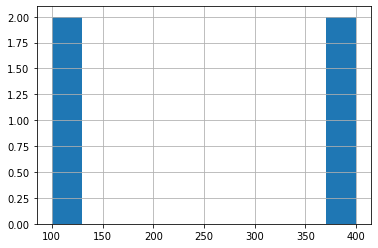

In [58]:
pd.value_counts(cats).hist()

##### Detecting and Filtering Outliers

In [59]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.037547,0.083084,0.014626,-0.013427
std,0.997801,0.999358,0.987564,1.051421
min,-3.366024,-3.642729,-3.626662,-3.387014
25%,-0.691428,-0.579838,-0.656172,-0.731177
50%,-0.018267,0.068502,0.037642,0.024048
75%,0.635680,0.743135,0.660297,0.732330
max,3.210059,3.060726,3.096167,3.136561


In [60]:
# extract the values of columns exceeding 3
# replacing those values with 3 and -3
data[(np.abs(data)>3).any(1)] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.047738,0.103306,0.011524,-0.016415
std,1.034218,1.039566,1.031593,1.095254
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.701820,-0.581117,-0.669187,-0.745003
50%,-0.018267,0.068502,0.037642,0.024048
75%,0.635680,0.755990,0.664511,0.734893
max,3.000000,3.000000,3.000000,3.000000


In [61]:
# how sign() function works
np.sign(data).head()

,0,1,2,3
0,1.0,1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0
2,-1.0,1.0,-1.0,-1.0
3,-1.0,-1.0,1.0,1.0
4,1.0,-1.0,1.0,-1.0


##### Permutation and Sampling 

In [62]:
df = pd.DataFrame(np.arange(20).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([2, 0, 3, 1, 4])

In [63]:
df.head()

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [64]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19


In [65]:
# without replacement
df.sample(n=3)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [66]:
# with replacement
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

4    4
3    6
2   -1
0    5
3    6
2   -1
4    4
3    6
4    4
3    6
dtype: int64

##### Computing Indicator / Dummy Variables

In [67]:
# converting categorical values to numerical
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                  'data1': range(6)}
                 )
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [68]:
pd.get_dummies(df)

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [69]:
# with explicit defined prefix
dummies = pd.get_dummies(df['key'], prefix = 'KeY')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,KeY_a,KeY_b,KeY_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


Creating Dummies on Movielens 1M dataset

In [70]:
!head ../datasets/movielens/movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller


In [71]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../datasets/movielens/movies.dat',
                      sep='::', header=None, names=mnames)
movies.head()

/home/seed9six/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/seed9six/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [72]:
# extracting unique genres since
all_genres = []
for genres in movies.genres.unique():
    all_genres.extend(genres.split('|'))
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [73]:
# creating dummies with genres
zero_m = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_m, columns=genres)
dummies.head(2)

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# take a look at examples of get_indexer
# we are going to use this
np.info(dummies.columns.get_indexer)

 get_indexer(target, method=None, limit=None, tolerance=None)

Compute indexer and mask for new index given the current index. The
indexer should be then used as an input to ndarray.take to align the
current data to the new index.

Parameters
----------
target : Index
method : {None, 'pad'/'ffill', 'backfill'/'bfill', 'nearest'}, optional
    * default: exact matches only.
    * pad / ffill: find the PREVIOUS index value if no exact match.
    * backfill / bfill: use NEXT index value if no exact match
    * nearest: use the NEAREST index value if no exact match. Tied
      distances are broken by preferring the larger index value.
limit : int, optional
    Maximum number of consecutive labels in ``target`` to match for
    inexact matches.
tolerance : optional
    Maximum distance between original and new labels for inexact
    matches. The values of the index at the matching locations most
    satisfy the equation ``abs(index[indexer] - target) <= tolerance``.

    Tolerance may be a 

In [75]:
# extracting genre for each row
print(movies.genres[0].split('|'))
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1
dummies.head(2)

['Animation', "Children's", 'Comedy']


,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# combining original df with dummies
movies_windic = movies.join(dummies.add_prefix('genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
genre_Animation                                1
genre_Children's                               1
genre_Comedy                                   1
genre_Adventure                                0
genre_Fantasy                                  0
genre_Romance                                  0
genre_Drama                                    0
genre_Action                                   0
genre_Crime                                    0
genre_Thriller                                 0
genre_Horror                                   0
genre_Sci-Fi                                   0
genre_Documentary                              0
genre_War                                      0
genre_Musical                                  0
genre_Mystery                                  0
genre_Film-Noir                                0
genre_Western       

In [77]:
%%time
movies.genres.apply(lambda x: dummies.columns.get_indexer(x.split('|')))
print()


CPU times: user 704 ms, sys: 18.9 ms, total: 723 ms
Wall time: 722 ms


Combining **get_dummies()** with discretization function

In [78]:
np.random.seed(12345)

In [79]:
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [80]:
bins = [0, .2, .4, .6, .8, 1]
pd.get_dummies(pd.cut(values, bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

#### 7.3 String Manipulation

##### String Object Methods

**splitting**

In [82]:
val = 'a,b, guido' # splitting by ,
val.split(',')

['a', 'b', ' guido']

**split()** with **strip()**

In [83]:
pieces = [x.strip() for x in val.split(',')] # strip trims whitespaces
pieces

['a', 'b', 'guido']

Concatentating strings manually

In [84]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

Concatenating strings with **join()**

In [85]:
'::'.join(pieces)

'a::b::guido'

Detecting substrings

In [86]:
'guido' in val

True

In [87]:
# index identifies first occurance and returns index
val.index(',')

1

In [88]:
val.find('::')# if not found find will return -1, but index will return error

-1

In [89]:
try:
    val.index('::')
except ValueError:
    print('ValueError')

ValueError


In [90]:
# count returns the number of occurances
val.count('::')

0

In [91]:
val.count(',')

2

In [92]:
# replace subtitutes the occurances
val.replace(',', '::')

'a::b:: guido'

In [93]:
val.replace(',', '')

'ab guido'

##### Regular Expressions

In [94]:
# Removing whitespaces
import re # regular expression python module
text = 'foo   bar\t baz \tqux'
re.split('\s+', text) # \s+ is regex for whitespaces

['foo', 'bar', 'baz', 'qux']

In [95]:
# creating reusable regex object
# regex is required to compile before applying
# this can be efficient when applying regex on large text
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [96]:
# to find all strings
regex.findall(text)

['   ', '\t ', ' \t']

In [97]:
# identifying emails from text
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""

In [101]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [102]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [103]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [105]:
# search() returns a match object
m = regex.search(text)
m# it only returns first matched string

<re.Match object; span=(5, 20), match='dave@google.com'>

In [106]:
text[m.start():m.end()]

'dave@google.com'

In [108]:
# match only look for pattern at the begining of the string
print(regex.match(text))

None


In [110]:
# sub replaces the pattern with input string and returns the same
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


In [113]:
# if we want to divide email address into usename, domain name, and suffix
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, re.IGNORECASE)

m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [114]:
# with findall() 
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [115]:
# using special symbols with sub
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com


##### Vectorized String Functions in Pandas

In [116]:
data = {'Dave': 'dave@google.com',
       'Steve': 'steve@gmail.com',
       'Rob': 'rob@gmail.com',
       'wes': np.nan}
data=pd.Series(data)

In [117]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
wes                  NaN
dtype: object

In [118]:
data.isnull()

Dave     False
Steve    False
Rob      False
wes       True
dtype: bool

In [119]:
# contains
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
wes        NaN
dtype: object

In [120]:
# using regex
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
wes                        NaN
dtype: object

In [121]:
# using match
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
wes       NaN
dtype: object

In [124]:
#str.get()

In [123]:
data.str.get(1)

Dave       a
Steve      t
Rob        o
wes      NaN
dtype: object

In [122]:
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
wes     NaN
dtype: float64

In [125]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
wes        NaN
dtype: object